In [7]:
# import needed packages
import numpy as np
from model_code import utilities_visuals as ut
from model_code import utilities_simulation as us
from model_code import ArgModel as normal_am
from model_code import reducedArgModel as reduced_am

In [2]:
M = 4
# defines the parameters needed to run the model
model_parameters = {
    "no_of_agents": 500
    , "no_of_iterations": 40000
    # strength of biased processing
    , "ß": 3.2
    # number of implicitly modelled arguments
    , "M": M
    # linkage matrix
    , "C": us.create_connection_matrix_symmetrical(no_of_arguments=M, normalised=True)
}

SPA_param = {
    'params_to_iter': np.array(['ß']),
    'sims_per_comb': 10,
    'boundaries': np.array([[0,6]]),
    'no_of_steps': np.array([3])
}

In [3]:
measures = {
    "time_until_consens": model_parameters["no_of_iterations"],
    #, "mean_attitude_END_VALUE": 0
    "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
}
measures_from_SPA_normal = normal_am.systematic_parameter_analysis(SPA_param, model_parameters, measures)
%store measures_from_SPA_normal

[0.]
[{'time_until_consens': 10, 'variance_attitude': array([0.075, 0.035, 0.035, 0.035, 0.025, 0.025, 0.015, 0.035, 0.035,
       0.05 ])}]
[{'time_until_consens': 10, 'variance_attitude': array([0.075, 0.035, 0.035, 0.035, 0.025, 0.025, 0.015, 0.035, 0.035,
       0.05 ])}, {'time_until_consens': 10, 'variance_attitude': array([0.125, 0.125, 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.1  , 0.1  ,
       0.11 ])}]
[{'time_until_consens': 10, 'variance_attitude': array([0.075, 0.035, 0.035, 0.035, 0.025, 0.025, 0.015, 0.035, 0.035,
       0.05 ])}, {'time_until_consens': 10, 'variance_attitude': array([0.125, 0.125, 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.1  , 0.1  ,
       0.11 ])}, {'time_until_consens': 10, 'variance_attitude': array([0.06 , 0.06 , 0.075, 0.075, 0.06 , 0.06 , 0.06 , 0.06 , 0.06 ,
       0.06 ])}]
[{'time_until_consens': 10, 'variance_attitude': array([0.075, 0.035, 0.035, 0.035, 0.025, 0.025, 0.015, 0.035, 0.035,
       0.05 ])}, {'time_until_consens': 10, 'variance_attitude'

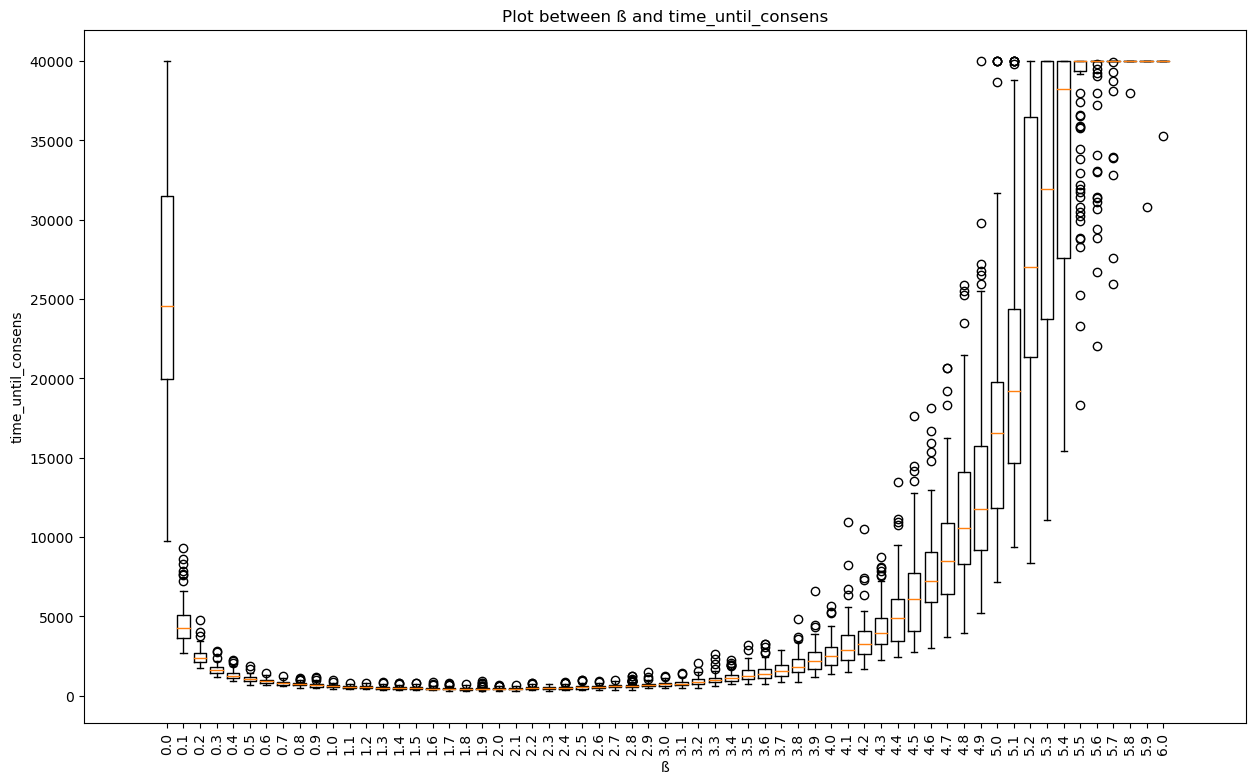

In [10]:
%store -r measures_from_SPA_normal
ut.xy_plot_measurement_boxplot('ß', 'time_until_consens', measures_from_SPA_normal)

In [3]:
measures = {
    "time_until_consens": model_parameters["no_of_iterations"]
    #, "mean_attitude_END_VALUE": 0
    #, "variance_attitude_END_VALUE": 0
    , "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
}
measures_from_SPA_reduced = reduced_am.systematic_parameter_analysis(SPA_param, model_parameters, measures)
%store measures_from_SPA_reduced

[0.]
[0.1]
[0.2]
[0.3]
[0.4]
[0.5]
[0.6]
[0.7]
[0.8]
[0.9]
[1.]
[1.1]
[1.2]
[1.3]
[1.4]
[1.5]
[1.6]
[1.7]
[1.8]
[1.9]
[2.]
[2.1]
[2.2]
[2.3]
[2.4]
[2.5]
[2.6]
[2.7]
[2.8]
[2.9]
[3.]
[3.1]
[3.2]
[3.3]
[3.4]
[3.5]
[3.6]
[3.7]
[3.8]
[3.9]
[4.]
[4.1]
[4.2]
[4.3]


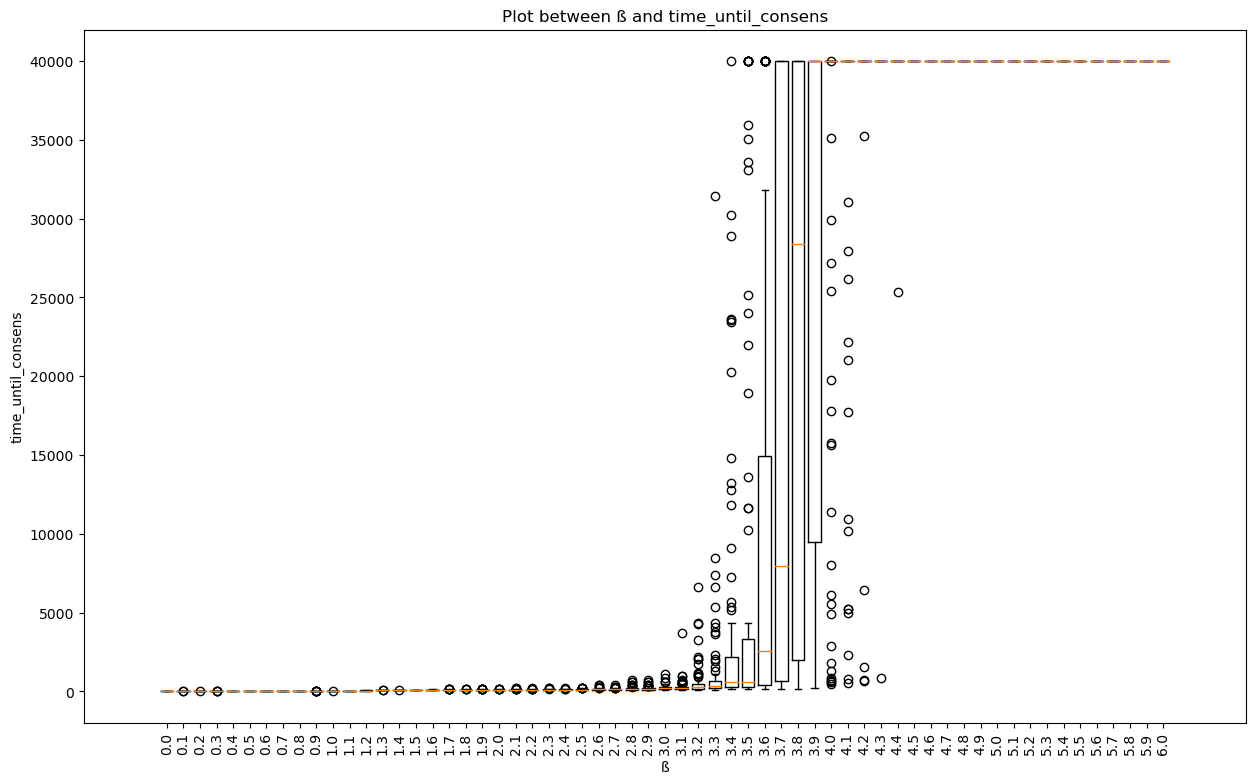

In [3]:
%store -r measures_from_SPA_reduced
ut.xy_plot_measurement_boxplot('ß', 'time_until_consens', measures_from_SPA_reduced)

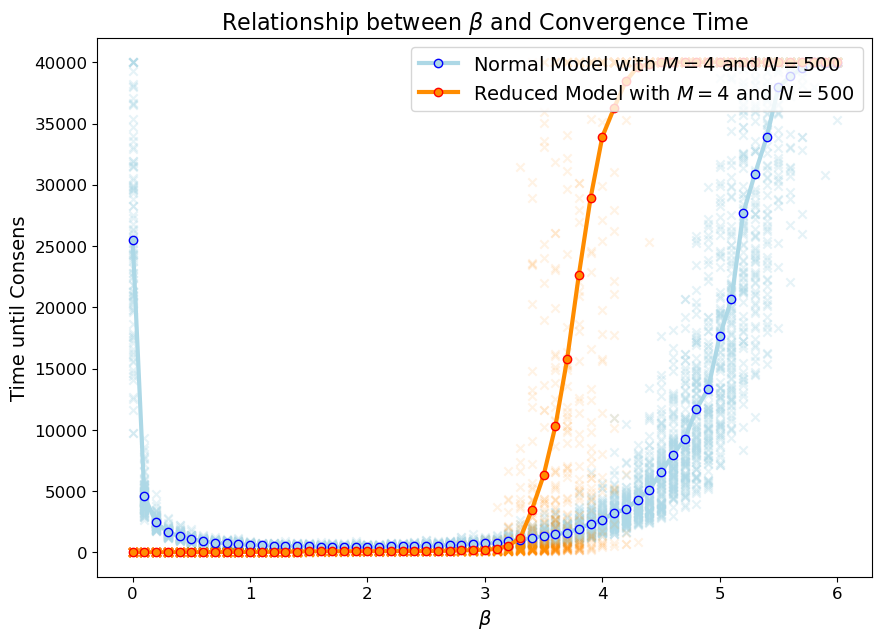

In [4]:
%store -r measures_from_SPA_reduced
%store -r measures_from_SPA_normal
from model_code import utilities_visuals as ut
ut.plot_beta_against_time_until_consens_two_sims(measures_from_SPA_normal, measures_from_SPA_reduced, 40000, "low_beta")

In [5]:
%store -r measures_from_SPA_normal
%store -r measures_from_SPA_reduced

In [4]:
for ele in measures_from_SPA_reduced:
    print(ele["ß"])
    print(ele["variance_attitude"])

0.0
[array([0.075, 0.035, 0.035, 0.035, 0.025, 0.025, 0.015, 0.035, 0.035,
       0.05 ]), array([0.125, 0.125, 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.1  , 0.1  ,
       0.11 ]), array([0.06 , 0.06 , 0.075, 0.075, 0.06 , 0.06 , 0.06 , 0.06 , 0.06 ,
       0.06 ]), array([0.015, 0.015, 0.015, 0.015, 0.01 , 0.01 , 0.01 , 0.015, 0.01 ,
       0.025]), array([0.135, 0.125, 0.125, 0.125, 0.125, 0.135, 0.135, 0.135, 0.135,
       0.135]), array([0.075, 0.06 , 0.1  , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.085,
       0.065]), array([0.14 , 0.165, 0.165, 0.16 , 0.16 , 0.16 , 0.125, 0.185, 0.185,
       0.19 ]), array([0.065, 0.065, 0.065, 0.065, 0.085, 0.085, 0.065, 0.065, 0.065,
       0.06 ]), array([0.135, 0.115, 0.115, 0.115, 0.115, 0.115, 0.065, 0.065, 0.085,
       0.1  ]), array([0.14 , 0.14 , 0.14 , 0.14 , 0.115, 0.115, 0.11 , 0.125, 0.11 ,
       0.085])]
3.0
[array([0.035, 0.075, 0.11 , 0.11 , 0.11 , 0.11 , 0.125, 0.125, 0.11 ,
       0.175]), array([0.185, 0.185, 0.175, 0.175, 0.125, 0.

ß: 0.0 and var [[0.075 0.035 0.035 0.035 0.025 0.025 0.015 0.035 0.035 0.05 ]
 [0.125 0.125 0.11  0.11  0.11  0.11  0.11  0.1   0.1   0.11 ]
 [0.06  0.06  0.075 0.075 0.06  0.06  0.06  0.06  0.06  0.06 ]
 [0.015 0.015 0.015 0.015 0.01  0.01  0.01  0.015 0.01  0.025]
 [0.135 0.125 0.125 0.125 0.125 0.135 0.135 0.135 0.135 0.135]
 [0.075 0.06  0.1   0.11  0.11  0.11  0.11  0.11  0.085 0.065]
 [0.14  0.165 0.165 0.16  0.16  0.16  0.125 0.185 0.185 0.19 ]
 [0.065 0.065 0.065 0.065 0.085 0.085 0.065 0.065 0.065 0.06 ]
 [0.135 0.115 0.115 0.115 0.115 0.115 0.065 0.065 0.085 0.1  ]
 [0.14  0.14  0.14  0.14  0.115 0.115 0.11  0.125 0.11  0.085]]
ß: 3.0 and var [[0.035 0.075 0.11  0.11  0.11  0.11  0.125 0.125 0.11  0.175]
 [0.185 0.185 0.175 0.175 0.125 0.125 0.085 0.085 0.075 0.075]
 [0.09  0.09  0.14  0.14  0.14  0.11  0.11  0.11  0.11  0.11 ]
 [0.11  0.11  0.11  0.14  0.11  0.11  0.11  0.11  0.125 0.125]
 [0.115 0.115 0.16  0.2   0.16  0.225 0.225 0.225 0.225 0.225]
 [0.085 0.125 0.185 0.18

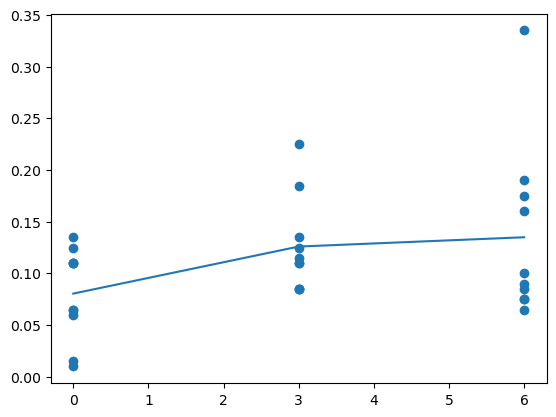

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from model_code import utilities_visuals as ut

def variance_consensusrate_against_beta(SyPaAn_data):

    data_points = ut.transform_SyPaAn_single_measure_single_dependency(SyPaAn_data, "variance_attitude", ["ß"], 1000)

    fig = plt.figure()

    print(data_points)
    print(data_points.shape)
    print(data_points[1,:])
    plt.scatter(data_points[1,:], data_points[0,:])


    # transform data into one vector containing all x values and one matrix containing in the column the y values for the respective x value
    x_values = np.unique(data_points[1])
    y_values = data_points[0].reshape(len(x_values),int(len(data_points[0])/len(x_values))).transpose()
    print(y_values)
    plt.plot(x_values, np.mean(y_values, axis=0))
    plt.show()



variance_consensusrate_against_beta(measures_from_SPA_normal)


In [4]:
measures_from_SPA_normal

[{'time_until_consens': [4821,
   4755,
   3737,
   9171,
   5253,
   3621,
   6978,
   4600,
   7501,
   7606,
   10000,
   4378,
   5439,
   6124,
   2910,
   3835,
   6085,
   5292,
   4053,
   4640,
   3479,
   5064,
   7078,
   7118,
   4417,
   3334,
   6155,
   9225,
   4028,
   4411,
   3002,
   4153,
   3174,
   4523,
   4354,
   3685,
   3213,
   2031,
   4488,
   4943,
   5543,
   3948,
   4902,
   5920,
   6405,
   3506,
   4777,
   4345,
   5039,
   2724],
  'no_of_agents': 100,
  'no_of_iterations': 10000,
  'ß': 0.0,
  'M': 4,
  'C': matrix([[ 0.25,  0.25,  0.25,  0.25, -0.25, -0.25, -0.25, -0.25]]),
  'model_type': 'Normal'},
 {'time_until_consens': [2762,
   4863,
   2744,
   4405,
   2268,
   6071,
   4154,
   6389,
   2925,
   2919,
   1619,
   4153,
   5387,
   3036,
   4441,
   3579,
   2328,
   1557,
   2747,
   2719,
   3557,
   4282,
   4008,
   3008,
   3362,
   4830,
   2198,
   4609,
   4069,
   2447,
   3514,
   2723,
   4516,
   4393,
   1983,
   2311,
   3

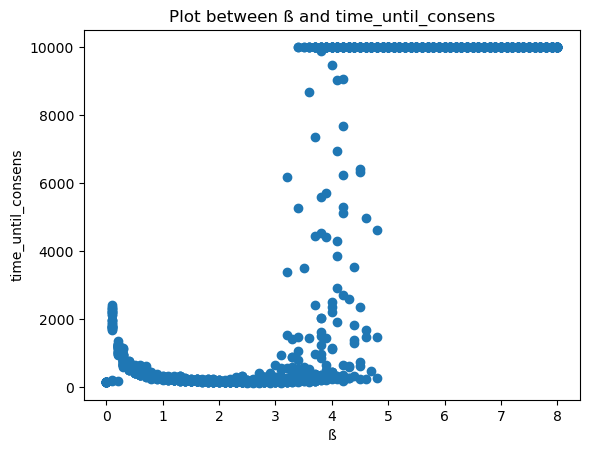

In [14]:
'measures_from_SPA_reduced_100agent = measures_from_SPA_reduced
%store measures_from_SPA_reduced_100agent

In [18]:
measures_from_SPA_normal_100agent = measures_from_SPA_normal
%store measures_from_SPA_normal_100agent

Stored 'measures_from_SPA_normal_100agent' (list)
